# 2023 Global Prosperity Index w/ Region Politics

### Purpose

The purpose of this notebook is to:
- Compare prosperity indicators across different regions.
- Analyze strengths and weaknesses of each region and identify key factors that contribute to regional prosperity.
- Investigate the relationships between different prosperity factors
- Develop policy recommendations for improving prosperity in Africa; focusing on areas such as governance, health and education to suggest actionable improvements.

**Note: Each prosperity factor for each country is ranked from 1 to 167. The lower the number, the better the score**

*ie. Spain has a score of 24 for safety_and_security while the United States has a score of 69. This implies that Spain is much safer and secure than the US.*

**Dataset Features**

- **country**: Country name
- **code**: ISO country code
- **region**: Geographical region
- **political_regime**: Type of political regime.
- **safety_and_security**: Score for the degree to which war, conflict, terror, and crime have destabilized security.
- **personal_freedom**: Score for progress towards legal rights, individual liberties, and social tolerance.
- **governance**: Score for the extent of checks on power, government effectiveness, and lack of corruption.
- **social_capital**: Score for the strength of personal/social relationships, institutional trust, social norms, and civic participation.
- **investment_environment**: Score for the protection and accessibility of investments.
- **enterprise_conditions**: Score for regulations enabling business start, competition, and expansion.
- **infrastructure_and_market_access**: Score for the quality of trade infrastructure and market conditions.
- **economic_quality**: Score for sustainable wealth generation and workforce engagement.
- **living_conditions**: Score for the quality of life, including material resources, shelter, basic services, and connectivity.
- **health**: Score for health outcomes, systems, illness/risk factors, and mortality rates.
- **education**: Score for enrolment, outcomes, and quality across education stages and adult skills.
- **natural_environment**: Score for aspects of the physical environment affecting daily life and future prosperity
- **average_score**: Overall average score

## Data Cleaning

In [1]:
# Importing necessary libraries

import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
from pandasql import sqldf # type: ignore
import seaborn as sns # type: ignore

%matplotlib inline

In [2]:
# Importing the dataset

df = pd.read_csv(r"C:\Users\Me\Desktop\Data Analysis\Datasets\global_prosperity_regions_politics.csv")

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
#Observing the data
df.head(10)

,country,code,region,political_regime,average_score,safety_and_security,personal_freedom,governance,social_capital,investment_environment,enterprise_conditions,infrastructure_and_market_access,economic_quality,living_conditions,health,education,natural_environment
0,Denmark,DNK,Europe,Liberal democracy,6.00,6,2,3,1,8,8,9,7,2,16,5,5
1,Sweden,SWE,Europe,Liberal democracy,6.83,10,4,7,4,6,15,7,8,3,9,8,1
2,Norway,NOR,Europe,Liberal democracy,7.25,3,1,2,3,9,14,20,5,4,7,10,9
3,Finland,FIN,Europe,Liberal democracy,8.00,15,3,1,7,2,12,10,20,7,15,2,2
4,Switzerland,CHE,Europe,Liberal democracy,6.75,2,12,4,12,12,1,11,2,5,10,4,6
5,Netherlands,NLD,Europe,Liberal democracy,9.08,9,5,5,8,3,9,3,10,1,11,6,39
6,Luxembourg,LUX,Europe,Liberal democracy,11.09,1,6,8,18,20,4,6,6,6,12,36,10
7,Iceland,ISL,Europe,Liberal democracy,12.59,8,7,10,5,19,20,19,21,10,8,11,13
8,Germany,DEU,Europe,Liberal democracy,12.66,19,9,9,20,21,6,5,11,8,13,19,12
9,New Zealand,NZL,Oceania,Liberal democracy,17.33,32,11,6,2,7,21,23,22,30,25,18,11


In [5]:
df.describe()

,average_score,safety_and_security,personal_freedom,governance,social_capital,investment_environment,enterprise_conditions,infrastructure_and_market_access,economic_quality,living_conditions,health,education,natural_environment
count,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00
mean,83.25,84.43,84.65,83.93,82.99,82.69,83.42,82.27,82.58,82.52,82.81,82.44,84.21
std,41.88,48.39,48.92,48.55,48.73,48.32,48.49,48.20,48.03,48.31,47.98,48.09,49.45
min,6.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,50.92,42.50,41.50,42.00,40.50,41.50,41.50,41.50,41.50,41.50,41.50,41.50,40.50
50%,86.25,84.00,84.00,84.00,82.00,81.00,83.00,81.00,81.00,81.00,82.00,81.00,85.00
75%,119.44,126.50,127.50,125.50,125.50,125.50,125.50,124.50,123.00,123.50,123.50,123.50,127.50
max,157.62,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country                           159 non-null    object 
 1   code                              159 non-null    object 
 2   region                            159 non-null    object 
 3   political_regime                  159 non-null    object 
 4   average_score                     159 non-null    float64
 5   safety_and_security               159 non-null    int64  
 6   personal_freedom                  159 non-null    int64  
 7   governance                        159 non-null    int64  
 8   social_capital                    159 non-null    int64  
 9   investment_environment            159 non-null    int64  
 10  enterprise_conditions             159 non-null    int64  
 11  infrastructure_and_market_access  159 non-null    int64  
 12  economic

In [7]:
#Checking for duplicated rows

df[df.duplicated()]

,country,code,region,political_regime,average_score,safety_and_security,personal_freedom,governance,social_capital,investment_environment,enterprise_conditions,infrastructure_and_market_access,economic_quality,living_conditions,health,education,natural_environment


## Investigating relationships between prosperity factors

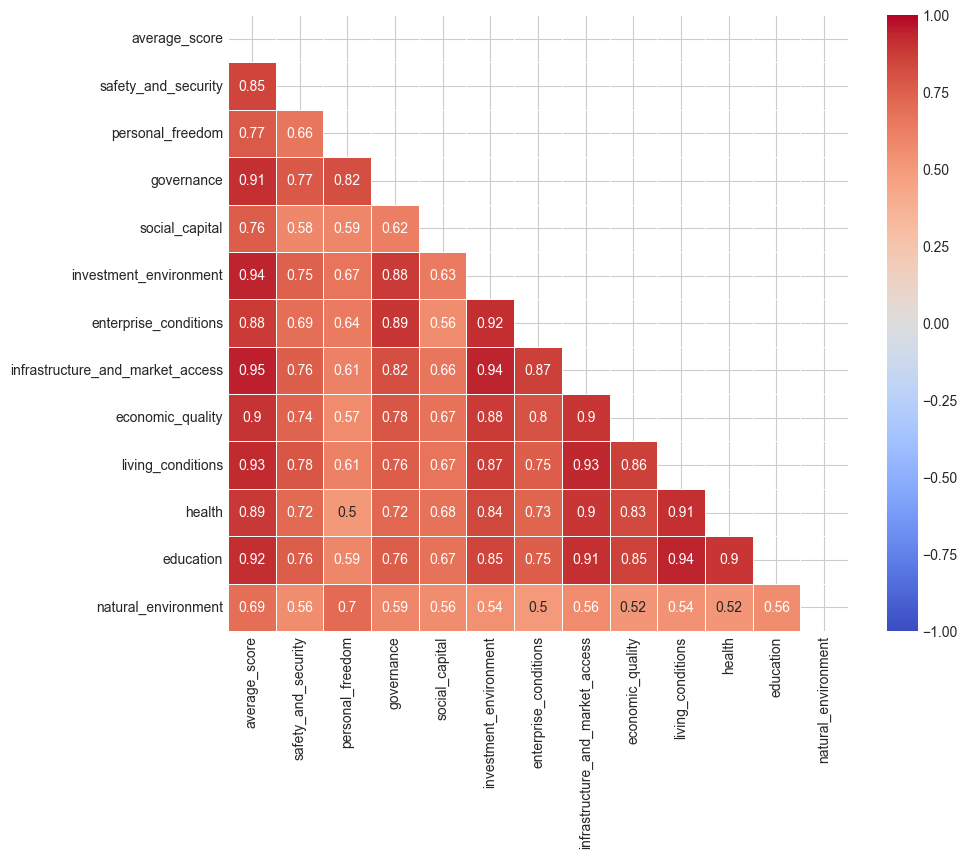

In [8]:
plt.style.use(style='seaborn-v0_8-whitegrid')
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, center=0, annot=True, linewidths=0.5, mask=mask)
plt.show()

## Prosperity Factors per Region

In [10]:
plt.style.use(style='bmh')

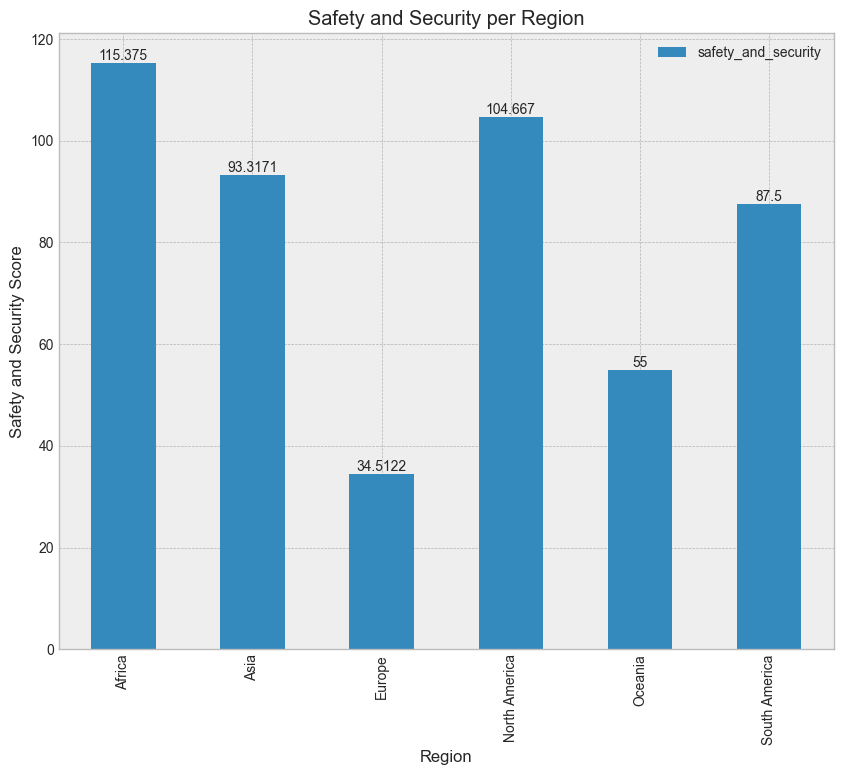

In [11]:
#Safety and Security

ss = df.groupby(by='region').agg({'safety_and_security':'mean'})
ax = ss.plot.bar(figsize=(10,8))
plt.ylabel('Safety and Security Score')
plt.xlabel('Region')
plt.title('Safety and Security per Region')
plt.bar_label(ax.containers[0])
plt.show()

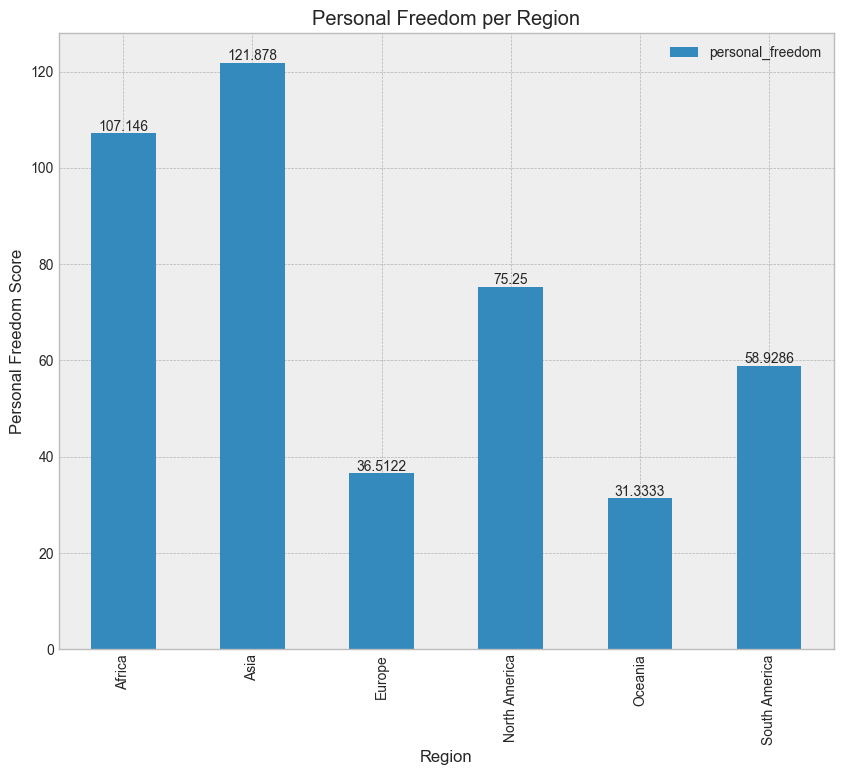

In [12]:
#Personal Freedom

pf = df.groupby(by='region').agg({'personal_freedom':'mean'})
ax = pf.plot.bar(figsize=(10,8))
plt.ylabel('Personal Freedom Score')
plt.xlabel('Region')
plt.title('Personal Freedom per Region')
plt.bar_label(ax.containers[0])
plt.show()

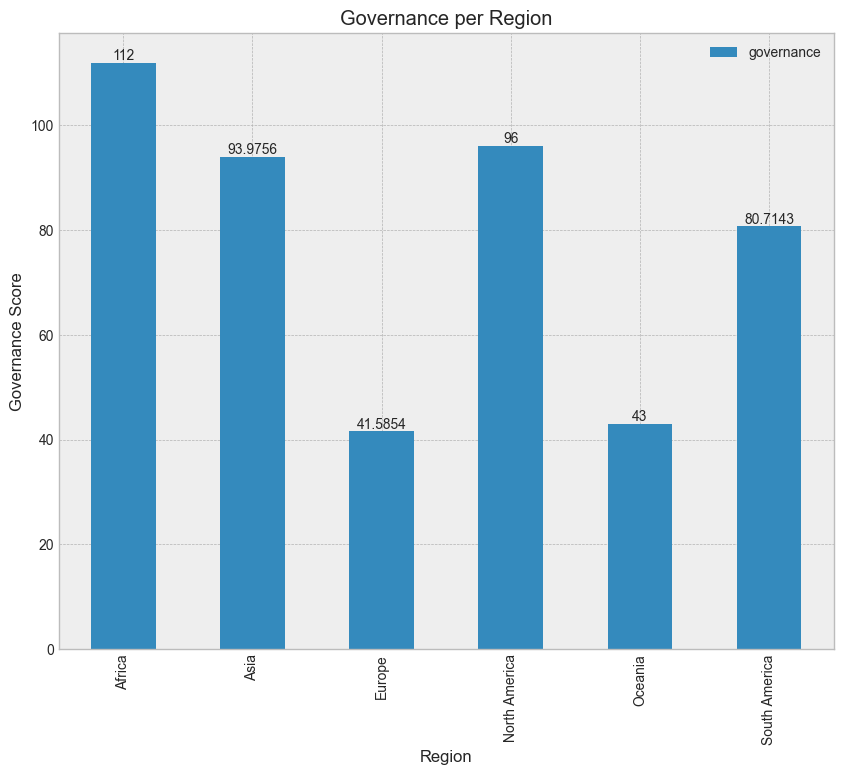

In [13]:
#Governance

gov = df.groupby(by='region').agg({'governance':'mean'})
ax = gov.plot.bar(figsize=(10,8))
plt.ylabel('Governance Score')
plt.xlabel('Region')
plt.title('Governance per Region')
plt.bar_label(ax.containers[0])
plt.show()

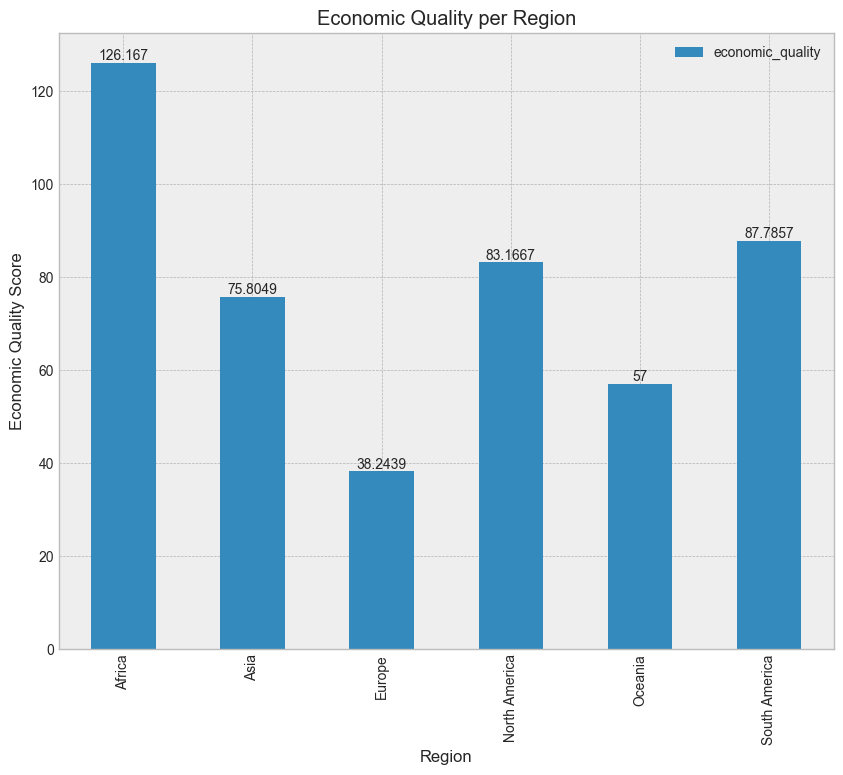

In [14]:
#Economic Quality

eco = df.groupby(by='region').agg({'economic_quality':'mean'})
ax = eco.plot.bar(figsize=(10,8))
plt.ylabel('Economic Quality Score')
plt.xlabel('Region')
plt.title('Economic Quality per Region')
plt.bar_label(ax.containers[0])
plt.show()

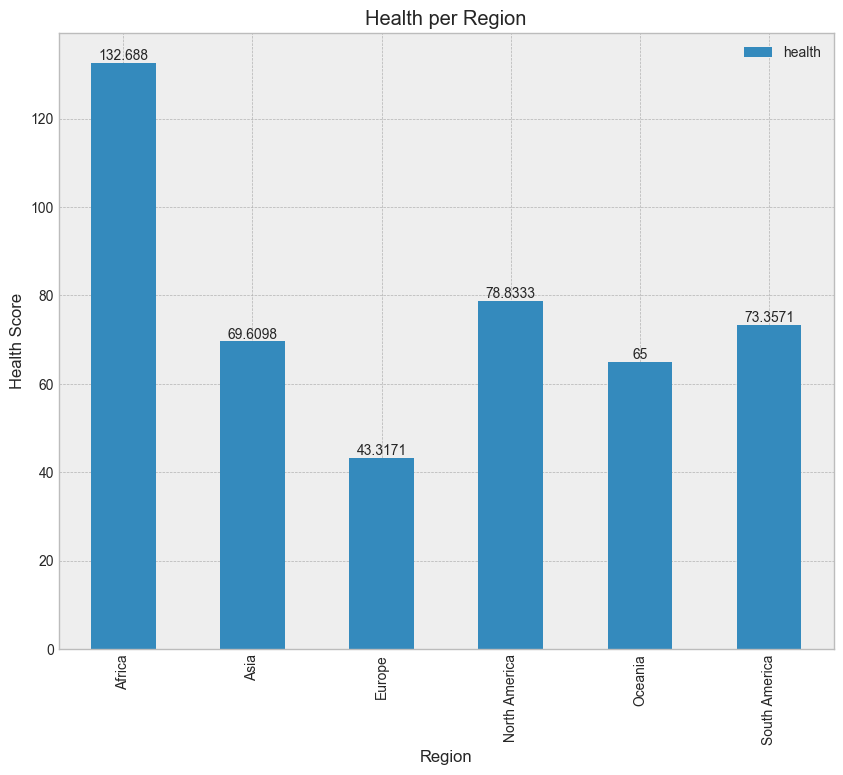

In [15]:
#Health

health = df.groupby(by='region').agg({'health':'mean'})
ax = health.plot.bar(figsize=(10,8))
plt.ylabel('Health Score')
plt.xlabel('Region')
plt.title('Health per Region')
plt.bar_label(ax.containers[0])
plt.show()

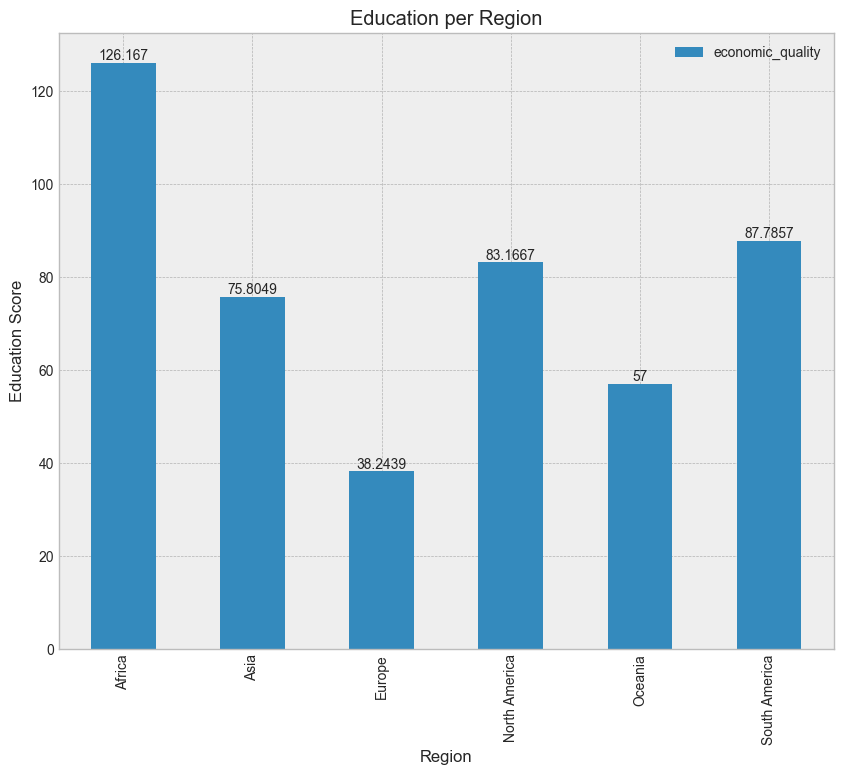

In [16]:
#Education

education = df.groupby(by='region').agg({'education':'mean'})
ax = eco.plot.bar(figsize=(10,8))
plt.ylabel('Education Score')
plt.xlabel('Region')
plt.title('Education per Region')
plt.bar_label(ax.containers[0])
plt.show()

We observe that Europe ranks the highest on average for all prosperity factors - with the exception of personal freedom in which Oceania ranks the highest. We also observe that Africa ranks the lowest on average for all prosperity factors - with the exception of personal freedom in which Asia ranks the lowest.

## Studying the African Region

In [17]:
africa = sqldf('''SELECT * FROM df WHERE region = 'Africa' ''')
africa.head(10)

,country,code,region,political_regime,average_score,safety_and_security,personal_freedom,governance,social_capital,investment_environment,enterprise_conditions,infrastructure_and_market_access,economic_quality,living_conditions,health,education,natural_environment
0,Mauritius,MUS,Africa,Electoral autocracy,59.16,42,52,36,37,41,54,53,72,60,81,62,120
1,Seychelles,SYC,Africa,Liberal democracy,60.25,52,71,44,53,67,61,61,90,63,39,68,54
2,South Africa,ZAF,Africa,Electoral democracy,82.38,136,38,49,40,48,63,68,74,102,129,102,140
3,Botswana,BWA,Africa,Electoral democracy,87.75,70,56,41,118,60,68,95,57,114,131,100,143
4,Namibia,NAM,Africa,Electoral democracy,89.81,65,53,46,92,80,55,100,133,122,125,109,98
5,Morocco,MAR,Africa,Closed autocracy,96.56,62,114,89,162,55,90,57,95,95,86,122,132
6,Ghana,GHA,Africa,Electoral democracy,96.25,79,50,58,114,98,50,114,134,115,119,118,106
7,Tunisia,TUN,Africa,Electoral autocracy,102.19,122,86,63,156,95,105,94,111,73,79,95,147
8,Senegal,SEN,Africa,Electoral democracy,95.25,104,62,59,65,102,56,116,122,117,117,148,75
9,Kenya,KEN,Africa,Electoral democracy,100.81,144,92,84,67,71,66,108,98,131,114,113,122


In [18]:
plt.style.use(style='bmh')

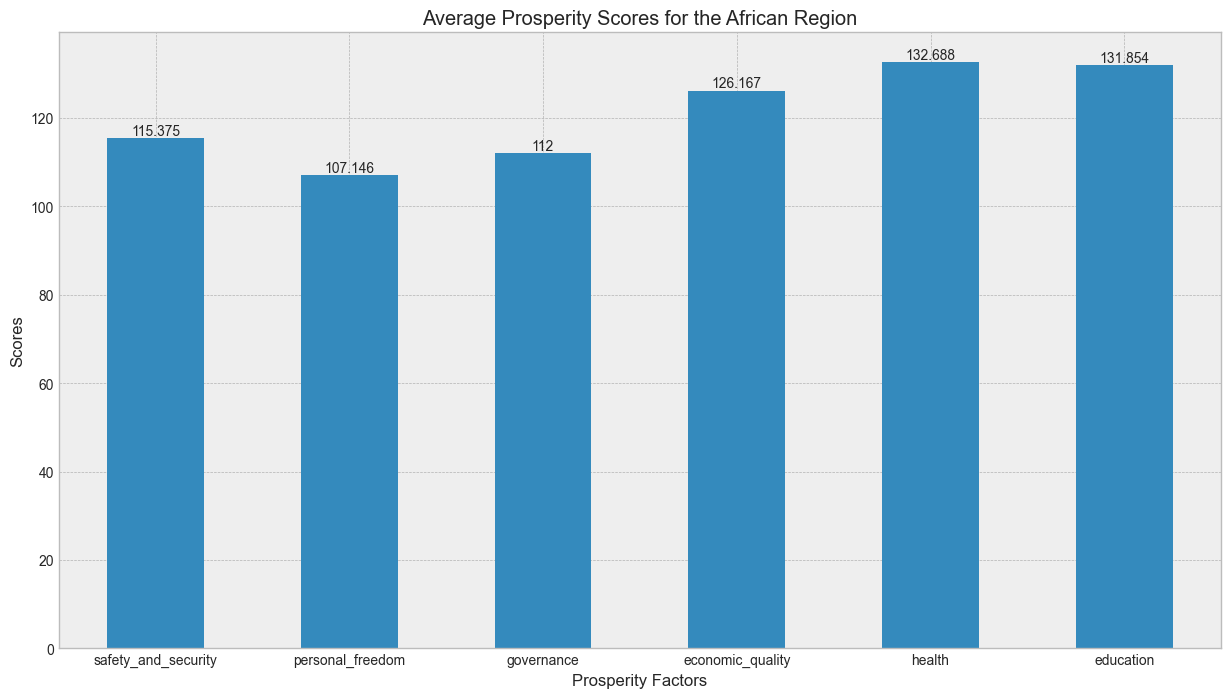

In [19]:
data = africa[['safety_and_security', 'personal_freedom', 'governance', 'economic_quality', 'health', 'education']].mean()
ax = data.plot.bar(figsize=(15,8))
plt.xlabel('Prosperity Factors')
plt.ylabel('Scores')
plt.title('Average Prosperity Scores for the African Region')
plt.xticks(rotation=0)
plt.bar_label(ax.containers[0])
plt.show()

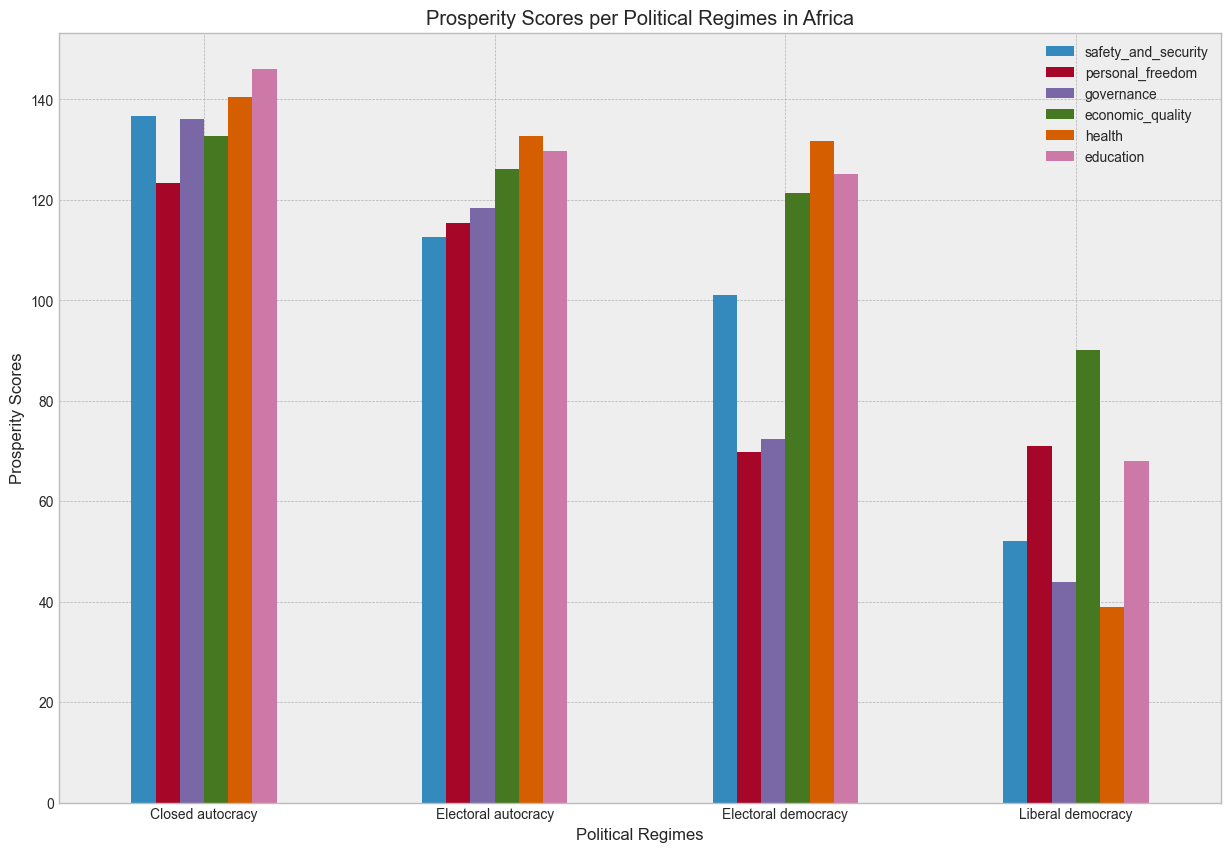

In [20]:
african_regimes = africa.groupby(by='political_regime').agg({'safety_and_security':'mean', 'personal_freedom':'mean', 'governance':'mean', 'economic_quality':'mean', 'health':'mean', 'education':'mean'})

african_regimes.plot.bar(figsize=(15,10))
plt.xlabel('Political Regimes')
plt.ylabel('Prosperity Scores')
plt.title('Prosperity Scores per Political Regimes in Africa')
plt.xticks(rotation=0)
plt.show()

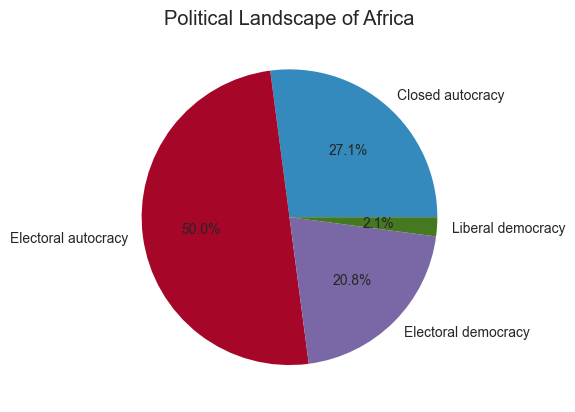

In [21]:
data = africa.groupby(by='political_regime').count()['country']
data.plot.pie(labels=data.index, autopct='%1.1f%%')
plt.title('Political Landscape of Africa')
plt.ylabel('')
plt.show()

In [22]:
sqldf(''' SELECT * FROM africa WHERE political_regime = 'Liberal democracy' ''')

,country,code,region,political_regime,average_score,safety_and_security,personal_freedom,governance,social_capital,investment_environment,enterprise_conditions,infrastructure_and_market_access,economic_quality,living_conditions,health,education,natural_environment
0,Seychelles,SYC,Africa,Liberal democracy,60.25,52,71,44,53,67,61,61,90,63,39,68,54


From the bar chart titled *Average Prosperity Scores for the African Region*, we see that countries in the African region rank lower on average in many prosperity factors.

If we divide the region, in terms of political regime, we see that the majority of prosperity scores are over 100, with the exception of liberal democracies.

However, upon further investigation, liberal democracies make up *2.1%* of the African region *(see Political Landscape of Africa chart)* with only one country, Seychelles, falling under such system.

We observe that closed autocracies have the higher average prosperity scores than any other political regime *(see Prosperity Scores per Political Regime in Africa)*. With *27.1%* of the African region under this system, this could play a heavy factor to African countries high prosperity scores.

Interestingly, electoral democracies, which make up *20.8%* of the African region, rank nearly as high as electoral autocracies in half of the prosperity factors - namely, economic quality, health and education - despite the latter making up a staggering *50.1%* of the region. Yet, we see a significant difference between the remain factors, between the two regimes, with personal freedom being ranked higher in electoral democracies than in liberal democracies.

## Policy Recommendations

In [23]:
north_america = sqldf('''SELECT * FROM df WHERE region = 'North America' ''')
north_america.head(10)

,country,code,region,political_regime,average_score,safety_and_security,personal_freedom,governance,social_capital,investment_environment,enterprise_conditions,infrastructure_and_market_access,economic_quality,living_conditions,health,education,natural_environment
0,Canada,CAN,North America,Liberal democracy,17.42,18,14,12,10,13,13,15,32,13,32,17,20
1,United States,USA,North America,Liberal democracy,26.31,69,29,23,9,17,3,4,16,29,69,20,28
2,Trinidad and Tobago,TTO,North America,Electoral democracy,73.06,84,41,60,75,79,98,75,70,55,64,69,107
3,Jamaica,JAM,North America,Electoral democracy,75.31,120,37,56,87,62,51,74,91,71,67,76,112
4,Dominican Republic,DOM,North America,Electoral democracy,76.69,108,46,90,50,81,79,69,66,88,89,99,55
5,Mexico,MEX,North America,Electoral democracy,77.25,148,80,101,61,66,81,47,49,86,71,77,60
6,El Salvador,SLV,North America,Electoral autocracy,98.94,125,88,102,85,92,94,77,107,90,98,108,121
7,Guatemala,GTM,North America,Electoral democracy,98.75,116,91,125,91,93,85,86,76,113,104,124,81
8,Cuba,CUB,North America,Closed autocracy,97.94,103,155,131,33,116,159,105,131,77,27,55,83
9,Honduras,HND,North America,Electoral democracy,99.25,129,94,141,56,91,100,88,100,111,99,117,65


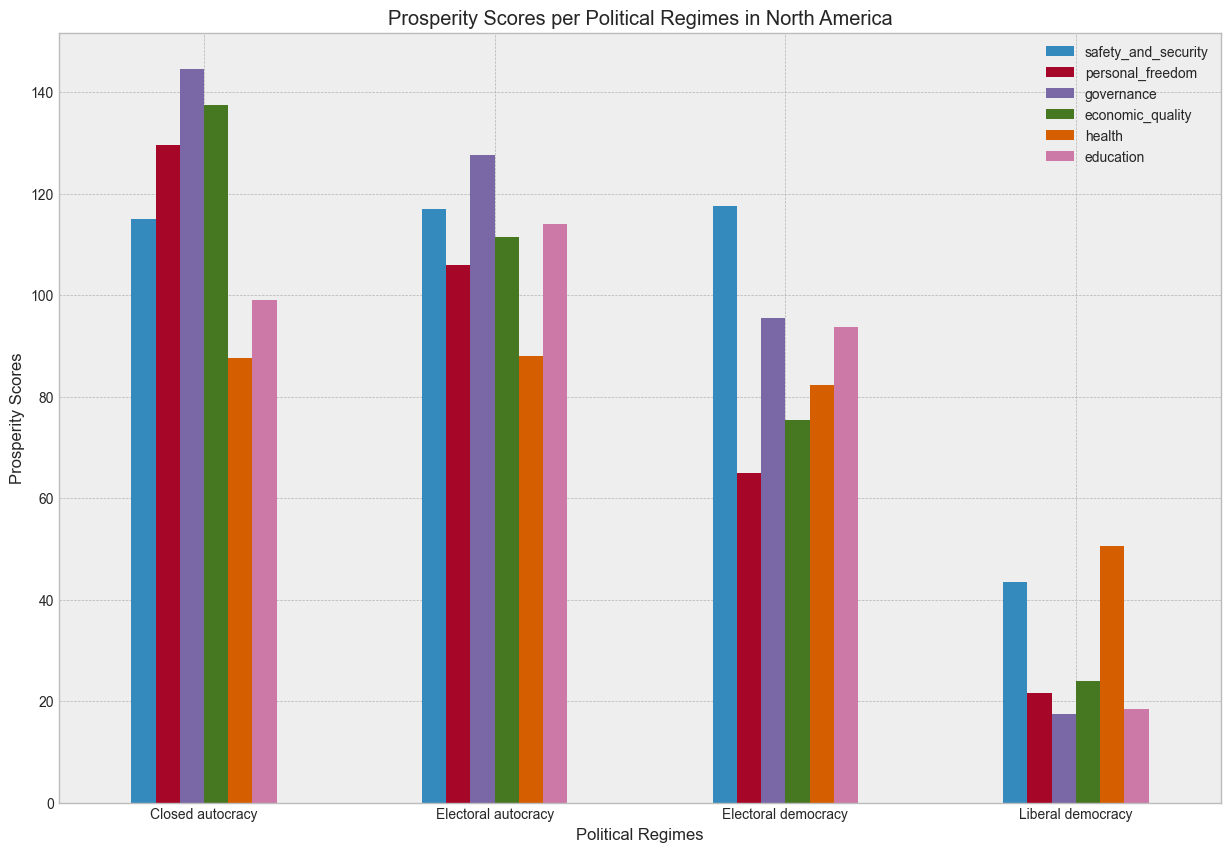

In [24]:
north_am_regimes = north_america.groupby(by='political_regime').agg({'safety_and_security':'mean', 'personal_freedom':'mean', 'governance':'mean', 'economic_quality':'mean', 'health':'mean', 'education':'mean'})

north_am_regimes.plot.bar(figsize=(15,10))
plt.xlabel('Political Regimes')
plt.ylabel('Prosperity Scores')
plt.title('Prosperity Scores per Political Regimes in North America')
plt.xticks(rotation=0)
plt.show()

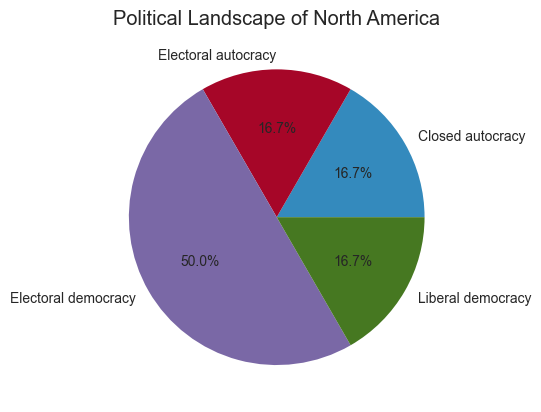

In [25]:
data = north_america.groupby(by='political_regime').count()['country']
data.plot.pie(labels=data.index, autopct='%1.1f%%')
plt.title('Political Landscape of North America')
plt.ylabel('')
plt.show()

We observe that the African region ranks lower *(higher prosperity factor scores)* in prosperity factors than other regions in the world such as North America *(lower prosperity factor scores)*. One of the main factors of this discrepancy, as shown in the dataset, is the political landscape of the region itself.

In North America, democracies account for 66.7% of the political landscape *(50.0% electoral democracy and 16.7% liberal democracy)* with the remaining 33.3% being autocracies *(16.7% closed autocracy and 16.7% electoral autocracy)*, whereas in Africa, autocracies account for 77.1% of the region's political landscape *(50.0% electoral autocracy and 27.1% closed autocracy)* with the remaining 22.9% being democracies *(20.8% electoral democracy and 2.1% liberal democracy)*.

Upon further inspection, we see that democracies tend to rank higher on average in contrast to autocracies which tend to rank lower on average. If we further delve into the prosperity factor scores for autocracies and democracies, we find that electoral autocracies have a higher ranking on average than closed autocracies. In regards to democracies, liberal democracies tend to rank higher than electoral democracies.

Combining the fact that democracies tend to rank higher in all prosperity factors than autocracies with the fact that the political landscape of Africa is predominantly comprised of autocracies than it is democracies, and we can see as to why the prosperity rankings of the African regions are lower than that of North America - a region predominantly comprised of democracies.

We recommend that African countries under an autocratic regime start to implement policies that will shift their political regimes to that of a more democratic one. Countries with a closed autocracy can start by transitioning into an electoral autocracy by implementing periodic elections amongst other things, whilst countries with an electoral autocracy can start to implement policies akin to that of a regime under an electoral democracy.

With the implementation of the new policies, these countries, and thus the greater African region, will see an increase in prosperity ranking in the near future.